# Apply Summary Statistic to whole data
Goal: Identify offspring of first cousins or closer

In [1]:
import numpy as np
import os as os
import sys as sys
import multiprocessing as mp
import pandas as pd
import socket
import matplotlib.pyplot as plt

### Pick the right path (whether on cluster or at home)
socket_name = socket.gethostname()
print(socket_name)
if socket_name == "VioletQueen":
    path = "/home/harald/git/HAPSBURG/"   # The Path on Harald's machine
elif socket_name.startswith("midway2"):
    print("Midway jnovmbre partition detected.")
    path = "/project2/jnovembre/hringbauer/HAPSBURG/"  # The Path on Midway Cluster
else: 
    raise RuntimeWarning("Not compatible machine. Check!!")
    
os.chdir(path)  # Set the right Path (in line with Atom default)

sys.path.append("./Python3/")  # Since now we are in the Root Directory
from hmm_inference import HMM_Analyze   # Do not move. Should be after sys.path..
#sys.path.append("./Python3/create1000G_Mosaic/")  # Since now we are in the Root Directory
#from createMosaicsMulti import Mosaic_1000G_Multi  # Import the object that can create the Multiruns

print(os.getcwd()) # Show the current working directory. Should be HAPSBURG/Notebooks/ParallelRuns
print(f"CPU Count: {mp.cpu_count()}")

VioletQueen
/home/harald/git/HAPSBURG
CPU Count: 4


### Load Data

In [2]:
df = pd.read_csv("./Empirical/roh_all_inds.csv", sep='\t')

In [47]:
# frac = 0.65    # The fraction of the short ROH substraction
# min_stat = 0.8 # The Minimum Stat
def calc_statistic(df, frac=0.65, cm = [4,8,12] ):
    """Calculate the statistic from cutoff.
    cm: Cutoffs [in centiMorgan]
    frac: Fraction of the lower category to substract"""
    statistic = df[f"sum_roh>{cm[2]}"] - frac * ((df[f"sum_roh>{cm[0]}"]) - df[f"sum_roh>{cm[1]}"])
    return statistic

def plot_statistic_hist(statistic, cut_off=70, bins=np.arange(-400,400,5),
                   figsize=(8,4)):
    """Plot histogram of Statistic"""
    plt.figure(figsize=figsize)
    ax=plt.gca()
    ax.hist(statistic, bins=bins, ec="k")
    ax.set_xlim([-400,400])
    ax.set_ylim([0,200])
    ax.set_title("Distribution Summary Statistic")
    ax.axvline(x=cut_off, color="red")
    plt.show()
    
def print_statistic(statistic, cutoff=[70,100,150,200]):
    """Print # Values of statistic bigger than cutoff"""
    n = len(statistic)
    for c in cutoff:
        n1 = np.sum(statistic>c)
        print(f"Bigger than {c}: {n1}/{n}")

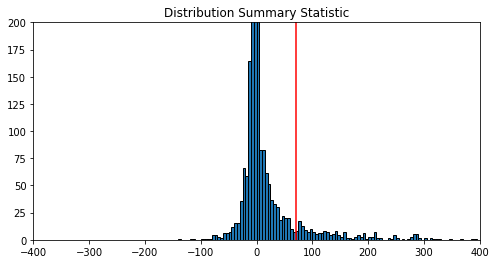

Bigger than 70: 216/3232
Bigger than 100: 152/3232
Bigger than 150: 92/3232
Bigger than 200: 60/3232


In [48]:
statistic = calc_statistic(df)
plot_statistic_hist(statistic)
print_statistic(statistic)

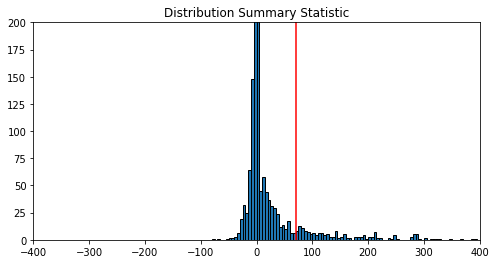

Bigger than 70: 179/1941
Bigger than 100: 127/1941
Bigger than 150: 80/1941
Bigger than 200: 54/1941


In [49]:
df_m = df[df["age"]==0].copy()
statistic = calc_statistic(df_m)
plot_statistic_hist(statistic)
print_statistic(statistic)

## Rank by statistic

In [38]:
statistic = calc_statistic(df)
idx = np.argsort(statistic)

In [42]:
### Calculate for Modern Samples
df_m = df[df["age"]==0].copy()
statistic = calc_statistic(df_m)
idx = np.argsort(statistic)

df_m.iloc[idx,:]

iid           pop     max_roh   sum_roh>4  n_roh>4  \
1304       Kusunda_8       Kusunda   17.500895  421.116423       57   
1358         Hadza_2         Hadza   28.286100  262.123512       40   
1560         Hadza_1         Hadza   10.636902   99.650816       17   
1578       Kalash_14        Kalash   11.871701   92.587928       14   
1579       Chukchi_3       Chukchi   11.070204   92.293502       14   
1626        Atayal_3        Atayal    8.487797   74.892797       14   
1677        Atayal_0        Atayal    7.705498   63.668915       11   
1616        Atayal_6        Atayal   10.270199   77.748809       12   
1668       Chukchi_7       Chukchi   10.340601   65.218099       10   
1505      Chukchi_21       Chukchi   10.392000  119.781691       17   
1730         Yakut_5         Yakut    7.710000   52.851219        8   
1533       Eskimo_14        Eskimo   14.808297  106.489784       17   
1609      Tubalar_17       Tubalar   11.465103   79.546109       12   
1696          Mixe_7          Mixe   10.881499   59.268001       10   
1526         Hadza_4         Hadza   12.667095  110.308495       16   
1659        Kalash_4        Kalash   10.888803   66.469993       10   
1670       Yukagir_4       Yukagir   10.518998   64.933592       11   
1671       Chukchi_2       Chukchi    9.731504   64.710799       10   
1707      Chukchi_18       Chukchi   11.776292   56.914302       10   
1720       Papuan_11        Papuan   10.478700   54.880090        9   
1742      Chukchi_20       Chukchi    8.600003   52.058204        9   
1800        Eskimo_8        Eskimo    6.093201   43.397806        9   
1570       Kalash_11        Kalash   15.847599   95.196077       14   
1737        Kalash_6        Kalash    9.333001   52.494009        9   
1686         Hadza_0         Hadza    9.909397   61.432686       10   
1538    Cochin_Jew_0    Cochin_Jew   11.537802  103.672399       14   
1746        Papuan_5        Papuan   10.212803   51.519814        9   
1818         Yakut_6         Yakut    7.415795   40.978492        7   
1693    Cochin_Jew_3    Cochin_Jew   10.068012   60.118424        9   
1743      Chukchi_16       Chukchi   11.806106   52.031097        9   
...              ...           ...         ...         ...      ...   
1308      Balochi_16       Balochi   51.099300  410.489315       30   
1332     BedouinA_11      BedouinA   75.687497  325.788194       15   
1306         Surui_3         Surui   50.861692  418.176677       28   
1309      Makrani_17       Makrani   48.696101  408.913315       27   
1349         Tujia_2         Tujia  157.113902  280.060284        3   
1316       Balochi_0       Balochi   90.107697  390.835010       20   
1318      Makrani_16       Makrani   38.863903  375.986565       22   
1300  Tunisian_Jew_2  Tunisian_Jew  101.071715  462.131325       28   
1312     Jordanian_2     Jordanian   33.541799  398.418900       26   
1322         Saudi_3         Saudi   66.003597  359.428709       20   
1305        Syrian_5        Syrian   65.470994  420.765380       27   
1314        Sindhi_9        Sindhi   39.794400  395.274110       24   
1325       Pathan_16        Pathan   55.872607  348.304323       18   
1326        Sindhi_4        Sindhi   43.713301  346.288899       21   
1320       Balochi_5       Balochi   51.195597  366.510165       20   
1298         Surui_7         Surui   36.485505  499.415998       38   
1302         Surui_5         Surui   36.631894  442.665492       30   
1324     Jordanian_5     Jordanian   48.661995  350.821298       19   
1303      Lebanese_1      Lebanese   46.195000  424.840383       25   
1310          Pima_5          Pima   51.157599  404.903109       22   
1311      Saharawi_5      Saharawi   47.007999  401.566989       21   
1299         Surui_6         Surui   96.734203  482.479889       28   
1301         Uzbek_4         Uzbek   73.301301  457.112501       23   
1292    Karitiana_11     Karitiana   71.722305  609.730034       38   
1296         Pima_11          Pima  124.8

### Do per Pop Statistics

In [81]:
cutoff= 70

df = pd.read_csv("./Empirical/roh_all_inds.csv", sep='\t')
statistic = calc_statistic(df)
df["statistic"] = statistic
df[f"statistic>{cutoff}"] = (statistic >= cutoff)

df_m = df[df["age"]==0].copy()
df_mg = df_m.groupby("pop")
df_pop_stat = df_mg[f"statistic>{cutoff}"].agg(["sum", 'count'])
df_pop_stat["percent"] = df_pop_stat["sum"]/df_pop_stat["count"]

In [76]:
### Calculate Binomial Confidence Intervalls
from scipy.stats import binom.inter

In [80]:
df_pop_stat.sort_values(by="percent", ascending=False)

sum  count   percent
pop                                 
Saami_WGA       1.0      1  1.000000
Surui           8.0      8  1.000000
Karitiana       9.0     12  0.750000
Syrian          5.0      8  0.625000
Balochi        11.0     20  0.550000
Makrani        10.0     20  0.500000
BedouinA       11.0     25  0.440000
Tunisian_Jew    3.0      7  0.428571
Pima            6.0     14  0.428571
Tunisian        3.0      8  0.375000
Druze          13.0     39  0.333333
Saharawi        2.0      6  0.333333
Jordanian       3.0      9  0.333333
Brahui          7.0     21  0.333333
Australian      1.0      3  0.333333
BedouinB        6.0     19  0.315789
Algerian        2.0      7  0.285714
Turkmen         2.0      7  0.285714
Sindhi          5.0     18  0.277778
Tajik_Pomiri    2.0      8  0.250000
Saudi           2.0      8  0.250000
Piapoco         1.0      4  0.250000
Lebanese        2.0      8  0.250000
Yemenite_Jew    2.0      8  0.250000
Palestinian     9.0     38  0.236842
Libyan_Jew      2.0      9  0.222222
Pathan          4.0     19  0.210526
Tujia           2.0     10  0.200000
Mixtec          2.0     10  0.200000
Uzbek           2.0     10  0.200000
...             ...    ...       ...
Lithuanian      0.0     10  0.000000
Lezgin          0.0      9  0.000000
Lahu            0.0      8  0.000000
Kusunda         0.0     10  0.000000
Koryak          0.0      9  0.000000
Abkhasian       0.0      9  0.000000
Kinh            0.0      8  0.000000
Kikuyu          0.0      4  0.000000
Kalmyk          0.0     10  0.000000
Kalash          0.0     18  0.000000
Ju_hoan_North   0.0      5  0.000000
Itelmen         0.0      6  0.000000
Italian_South   0.0      1  0.000000
Icelandic       0.0     12  0.000000
Finnish         0.0      7  0.000000
Hungarian       0.0     20  0.000000
Hezhen          0.0      8  0.000000
Han_NChina      0.0     10  0.000000
Han             0.0     33  0.000000
Hadza           0.0      5  0.000000
GujaratiD       0.0      5  0.000000
GujaratiC       0.0      5  0.000000
GujaratiB       0.0      5  0.000000
GujaratiA       0.0      5  0.000000
Greek           0.0     20  0.000000
Georgian_Jew    0.0      7  0.000000
Georgian        0.0     10  0.000000
Gambian         0.0      6  0.000000
French_South    0.0      7  0.000000
Zapotec         0.0     10  0.000000

[162 rows x 3 columns]

# Area 51

In [83]:
from statsmodels.stats.proportion import proportion_confint

In [93]:
proportion_confint(1,20)

(0.0, 0.14551682940272123)

In [102]:
proportion_confint(0,100, method="wilson")

(0.0, 0.03699349820698569)

In [105]:
proportion_confint(0,100, method="jeffreys")

(4.898073104397494e-06, 0.02474527001526987)

In [101]:
3/50

0.06